In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [4]:
data = pd.read_csv('./augmented_df2.csv')
data.columns

Index(['Unnamed: 0', 'HER2', 'ER', 'PR', 'HR', 'text', 'SUBTYPE'], dtype='object')

In [5]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [6]:
data['Word_count'] = data['text'].apply(word_count)
data.head(10)

,Unnamed: 0,HER2,ER,PR,HR,text,SUBTYPE,Word_count
0,TCGA-3C-AALI,1.0,1.0,1.0,1.0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,881
1,TCGA-3C-AALK,1.0,1.0,1.0,1.0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,1585
2,TCGA-5L-AAT0,0.0,1.0,1.0,1.0,Gender: Female. Color: White. Origin: Nature o...,hr+her2-,85
3,TCGA-A1-A0SB,0.0,1.0,0.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1993
4,TCGA-A1-A0SD,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1675
5,TCGA-A1-A0SE,0.0,1.0,1.0,1.0,"Final Pathologic Diagnosis: A. Right breast, b...",hr+her2-,2843
6,TCGA-A1-A0SF,0.0,1.0,1.0,1.0,Working Draft. CELLULAR CHANGES WITHIN NORMAL ...,hr+her2-,2580
7,TCGA-A1-A0SG,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Right axillary ...,hr+her2-,1173
8,TCGA-A1-A0SH,0.0,0.0,1.0,1.0,"Final Pathologic Diagnosis: A. Lymph node, sen...",hr+her2-,1371
9,TCGA-A1-A0SI,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1893


In [8]:
data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,Unnamed: 0,HER2,ER,PR,HR,text,SUBTYPE,Word_count,mean_word_length
0,TCGA-3C-AALI,1.0,1.0,1.0,1.0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,881,5.353008
1,TCGA-3C-AALK,1.0,1.0,1.0,1.0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,1585,5.560883
2,TCGA-5L-AAT0,0.0,1.0,1.0,1.0,Gender: Female. Color: White. Origin: Nature o...,hr+her2-,85,5.976471
3,TCGA-A1-A0SB,0.0,1.0,0.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1993,5.524837
4,TCGA-A1-A0SD,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1675,6.314030
5,TCGA-A1-A0SE,0.0,1.0,1.0,1.0,"Final Pathologic Diagnosis: A. Right breast, b...",hr+her2-,2843,5.676750
6,TCGA-A1-A0SF,0.0,1.0,1.0,1.0,Working Draft. CELLULAR CHANGES WITHIN NORMAL ...,hr+her2-,2580,6.265891
7,TCGA-A1-A0SG,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Right axillary ...,hr+her2-,1173,5.602728
8,TCGA-A1-A0SH,0.0,0.0,1.0,1.0,"Final Pathologic Diagnosis: A. Lymph node, sen...",hr+her2-,1371,6.081692
9,TCGA-A1-A0SI,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1893,5.937137


In [10]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['text'][0])])

44.51219512195122

In [12]:
data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,Unnamed: 0,HER2,ER,PR,HR,text,SUBTYPE,Word_count,mean_word_length,mean_sent_length
0,TCGA-3C-AALI,1.0,1.0,1.0,1.0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,881,5.353008,44.512195
1,TCGA-3C-AALK,1.0,1.0,1.0,1.0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,1585,5.560883,49.731707
2,TCGA-5L-AAT0,0.0,1.0,1.0,1.0,Gender: Female. Color: White. Origin: Nature o...,hr+her2-,85,5.976471,33.882353
3,TCGA-A1-A0SB,0.0,1.0,0.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1993,5.524837,44.950530
4,TCGA-A1-A0SD,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1675,6.314030,43.879121
5,TCGA-A1-A0SE,0.0,1.0,1.0,1.0,"Final Pathologic Diagnosis: A. Right breast, b...",hr+her2-,2843,5.676750,50.169811
6,TCGA-A1-A0SF,0.0,1.0,1.0,1.0,Working Draft. CELLULAR CHANGES WITHIN NORMAL ...,hr+her2-,2580,6.265891,42.696970
7,TCGA-A1-A0SG,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Right axillary ...,hr+her2-,1173,5.602728,48.647436
8,TCGA-A1-A0SH,0.0,0.0,1.0,1.0,"Final Pathologic Diagnosis: A. Lymph node, sen...",hr+her2-,1371,6.081692,45.903382
9,TCGA-A1-A0SI,0.0,1.0,1.0,1.0,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,1893,5.937137,46.930657


In [30]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['SUBTYPE'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(x=data[col], hue=data['SUBTYPE'])
    plt.legend(data['SUBTYPE'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

['Word_count', 'mean_word_length', 'mean_sent_length']



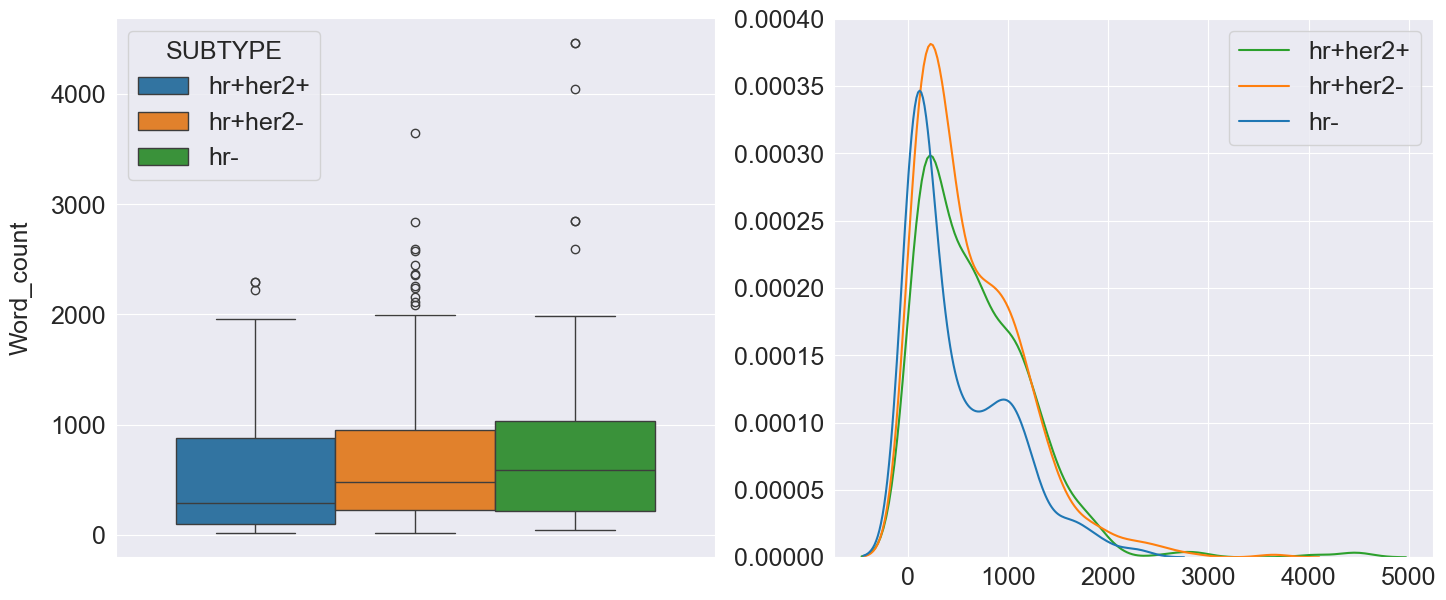

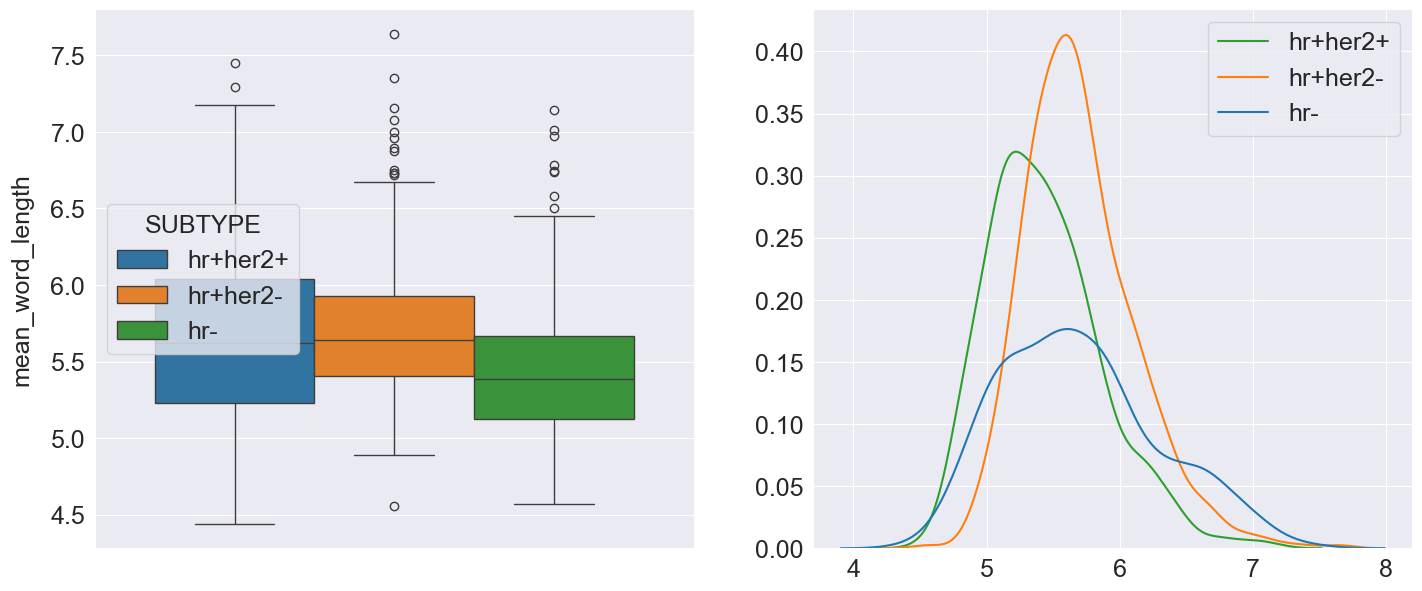

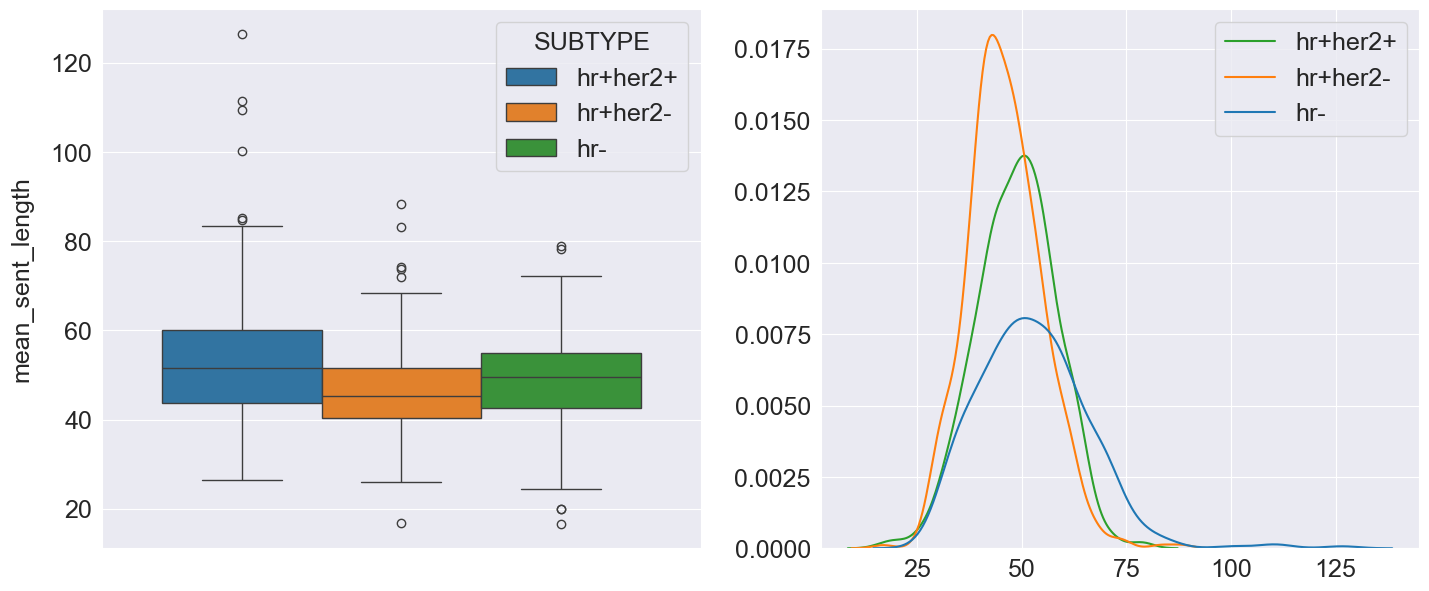

In [31]:
features = data.columns.tolist()[7:]
print(features)
for feature in features:
    visualize(feature)

In [35]:
df = data.drop(features + ['HER2', 'ER', 'PR', 'HR', 'Unnamed: 0'], axis=1)
df.head()

,text,SUBTYPE
0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+
1,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+
2,Gender: Female. Color: White. Origin: Nature o...,hr+her2-
3,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-
4,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-


In [32]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [37]:
df['clean_text'] = df['text'].apply(clean)
df.head(10)

,text,SUBTYPE,clean_text
0,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,path date obtained age date received f see add...
1,Path No.: Date Obtained: (Age: ). Date Receive...,hr+her2+,path date obtained age date received f see add...
2,Gender: Female. Color: White. Origin: Nature o...,hr+her2-,gender female color white origin nature materi...
3,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,final pathologic diagnosis sentinel lymph node...
4,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,final pathologic diagnosis sentinel lymph node...
5,"Final Pathologic Diagnosis: A. Right breast, b...",hr+her2-,final pathologic diagnosis right breast biopsy...
6,Working Draft. CELLULAR CHANGES WITHIN NORMAL ...,hr+her2-,working draft cellular changes within normal l...
7,Final Pathologic Diagnosis: A. Right axillary ...,hr+her2-,final pathologic diagnosis right axillary sent...
8,"Final Pathologic Diagnosis: A. Lymph node, sen...",hr+her2-,final pathologic diagnosis lymph node sentinel...
9,Final Pathologic Diagnosis: A. Sentinel lymph ...,hr+her2-,final pathologic diagnosis sentinel lymph node...


In [39]:
def corpus(text):
    text_list = text.split()
    return text_list

df['text_lists'] = df['clean_text'].apply(corpus)
print(df.head(10))


corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['text_lists'][i]
print(len(corpus))

                                                text   SUBTYPE  \
0  Path No.: Date Obtained: (Age: ). Date Receive...  hr+her2+   
1  Path No.: Date Obtained: (Age: ). Date Receive...  hr+her2+   
2  Gender: Female. Color: White. Origin: Nature o...  hr+her2-   
3  Final Pathologic Diagnosis: A. Sentinel lymph ...  hr+her2-   
4  Final Pathologic Diagnosis: A. Sentinel lymph ...  hr+her2-   
5  Final Pathologic Diagnosis: A. Right breast, b...  hr+her2-   
6  Working Draft. CELLULAR CHANGES WITHIN NORMAL ...  hr+her2-   
7  Final Pathologic Diagnosis: A. Right axillary ...  hr+her2-   
8  Final Pathologic Diagnosis: A. Lymph node, sen...  hr+her2-   
9  Final Pathologic Diagnosis: A. Sentinel lymph ...  hr+her2-   

                                          clean_text  \
0  path date obtained age date received f see add...   
1  path date obtained age date received f see add...   
2  gender female color white origin nature materi...   
3  final pathologic diagnosis sentinel lymph node

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1431/1431 [00:00<00:00, 62386.17it/s]

663453


In [40]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('cm', 13597),
 ('lymph', 12023),
 ('-', 11122),
 ('x', 10770),
 ('node', 9657),
 ('tumor', 9431),
 ('breast', 9216),
 ('1', 8966),
 ('margin', 8181),
 ('carcinoma', 7896)]

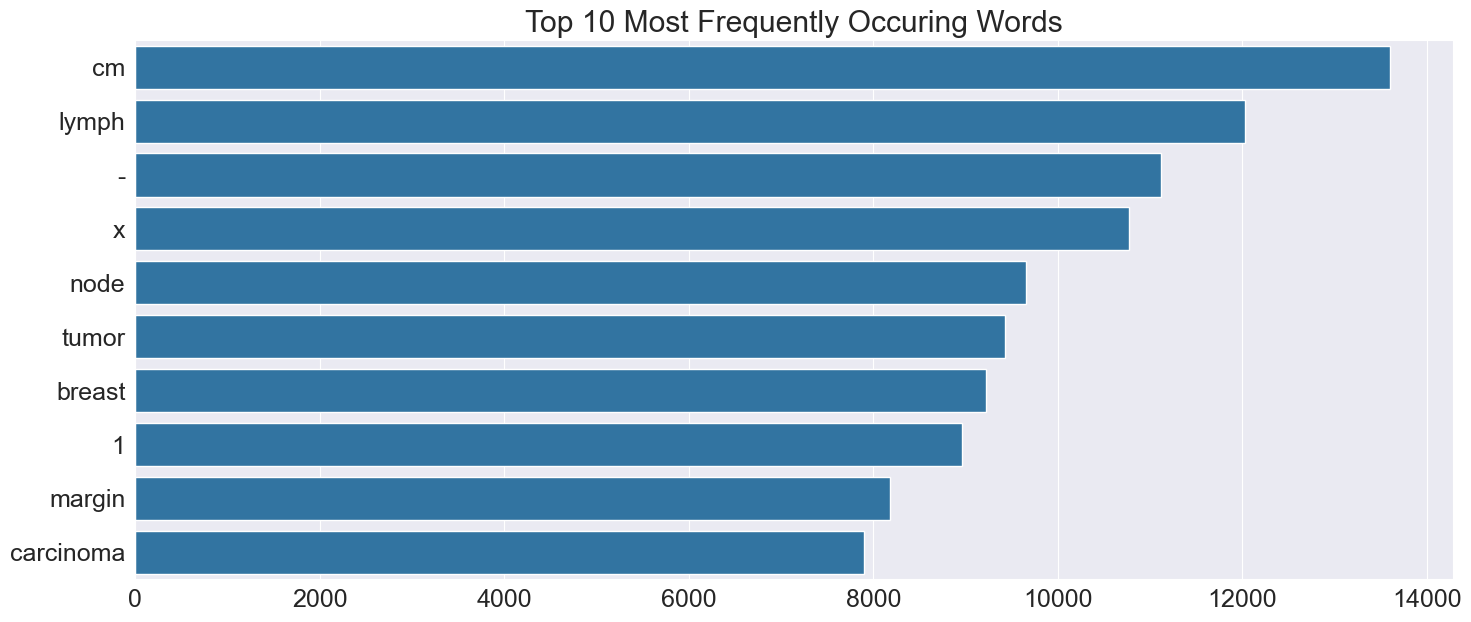

In [41]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

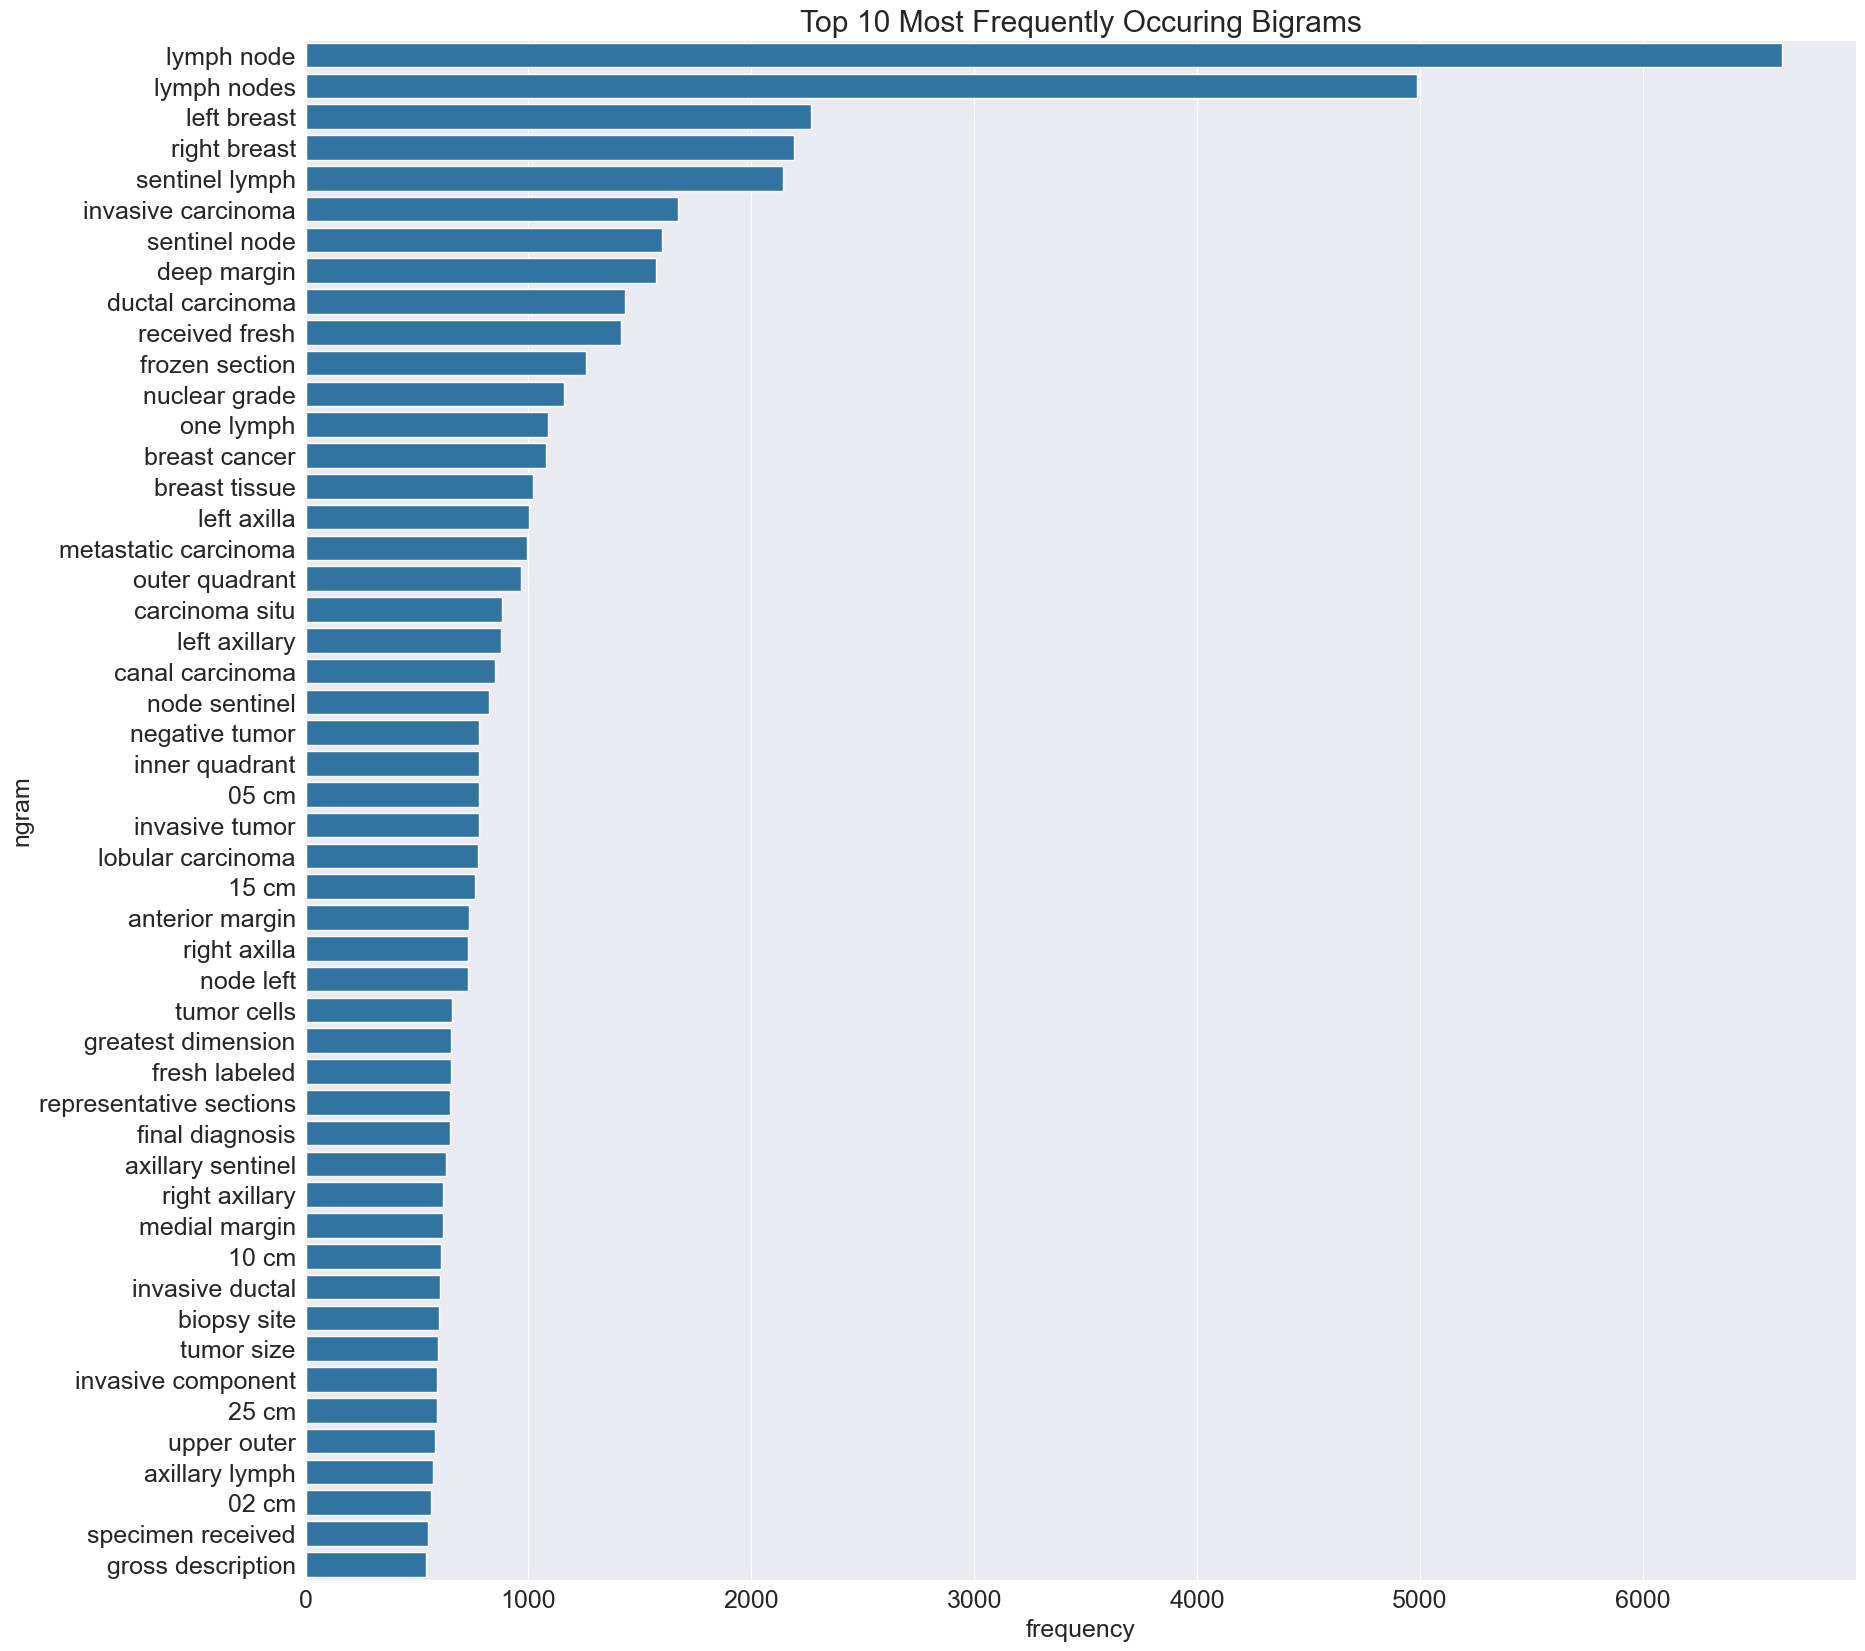

In [50]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['clean_text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

plt.figure(figsize=(20, 20))
sns.barplot(x=ngram_freq['frequency'][:50], y=ngram_freq['ngram'][:50])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

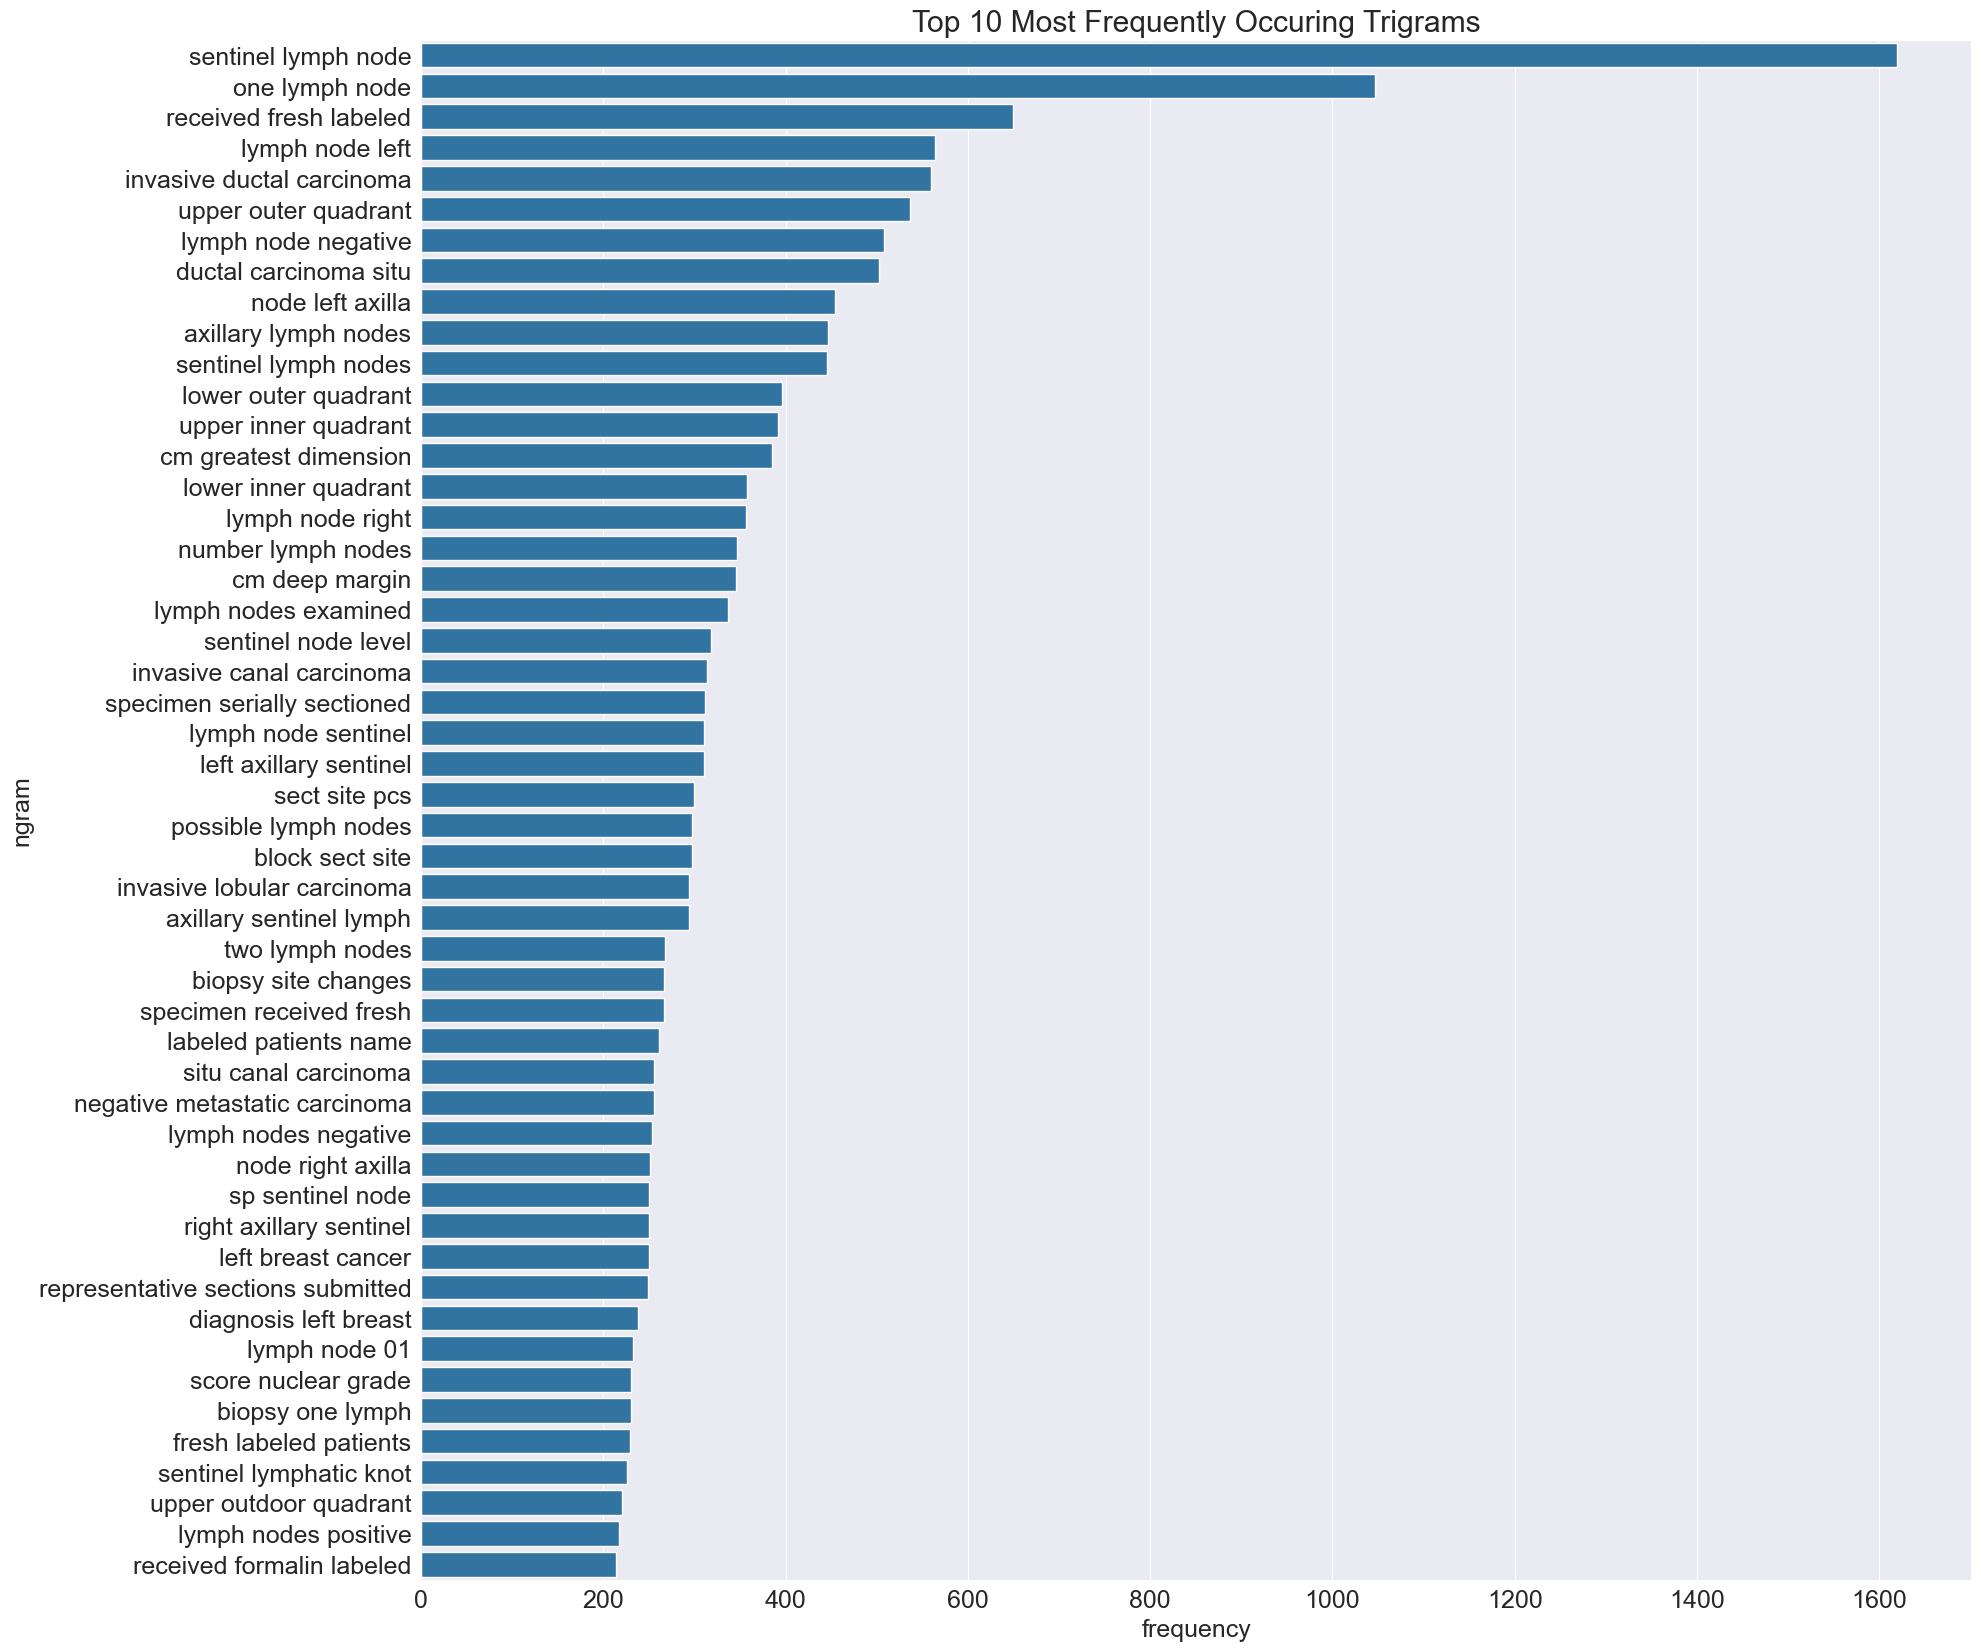

In [52]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['clean_text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

plt.figure(figsize=(20, 20))
sns.barplot(x=ngram_freq['frequency'][:50], y=ngram_freq['ngram'][:50])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()